In [40]:
from __future__ import division, print_function, unicode_literals
import numpy as np
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## load_data

In [41]:
housing = pd.read_csv('./datasets/housing/housing.csv')

In [42]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


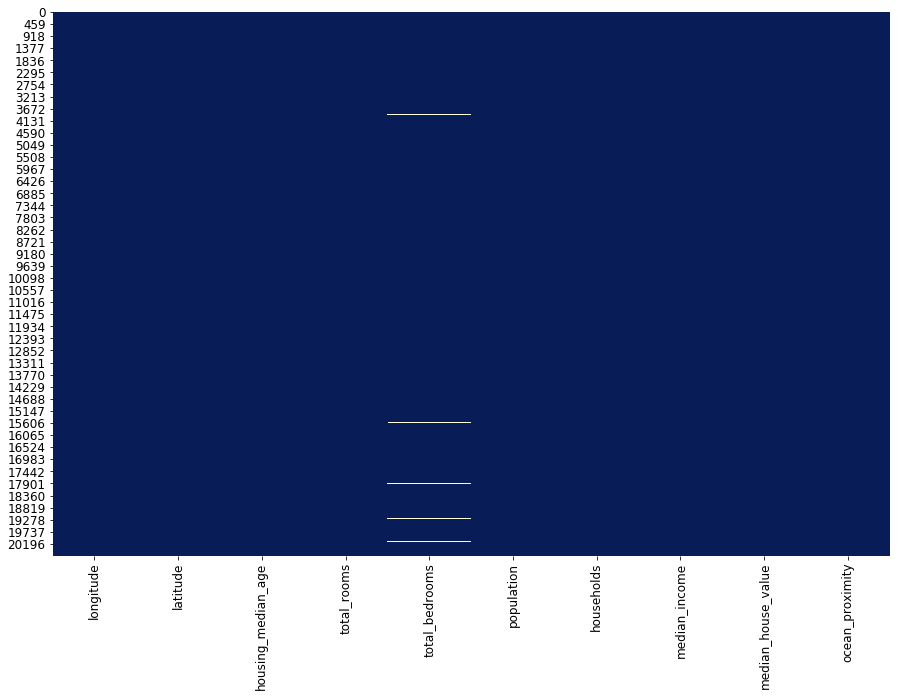

In [44]:
plt.figure(figsize = (15,10))
sns.heatmap( housing.isnull(), cbar = False,cmap ="YlGnBu_r")
plt.show()

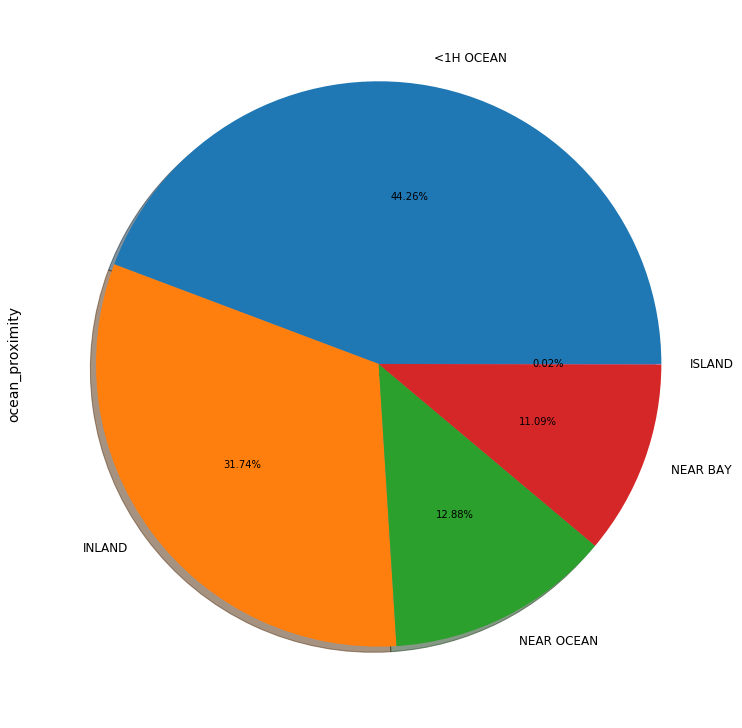

In [45]:
housing['ocean_proximity'].value_counts().plot.pie(autopct = '%1.2f%%', shadow = True,figsize = (18,13))
plt.show()

In [46]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


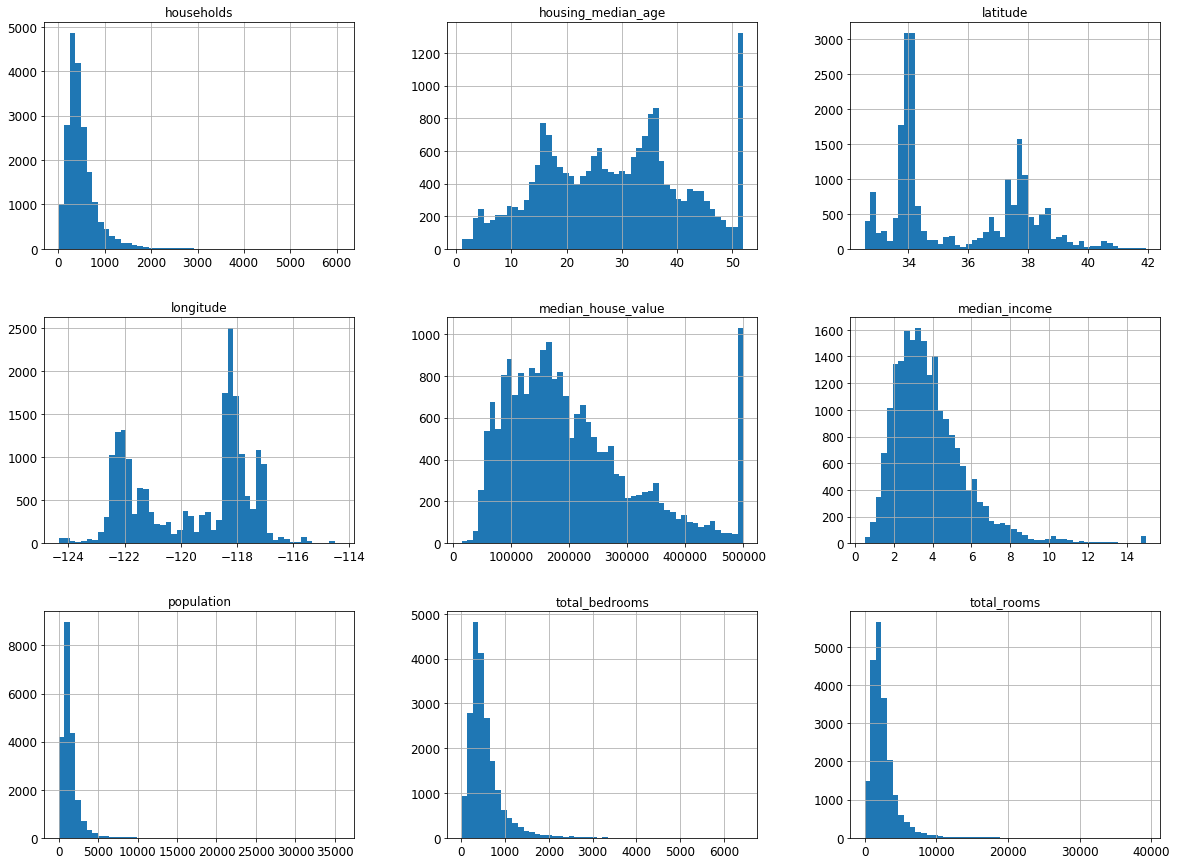

In [47]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [48]:
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len (data)) # 打乱数据，返回下标
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# 直接调用sklearn
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_trian,y_test = train_test_split(X,y, test_size = 0.3, random_state = 666)

In [49]:
train_set, test_set = split_train_test(housing,0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


## 这块不是太懂

In [50]:
from zlib import crc32  # crc32 : Computes a CRC (Cyclic Redundancy Check) checksum of data. The result is an unsigned 32-bit integer 
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32  #To generate the same numeric value across all Python versions and platforms, use crc32(data) & 0xffffffff

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [51]:
housing_with_id = housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id, 0.2,'index')
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [52]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


## 直接调用sklearn

In [53]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [54]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


/data1/tangx/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


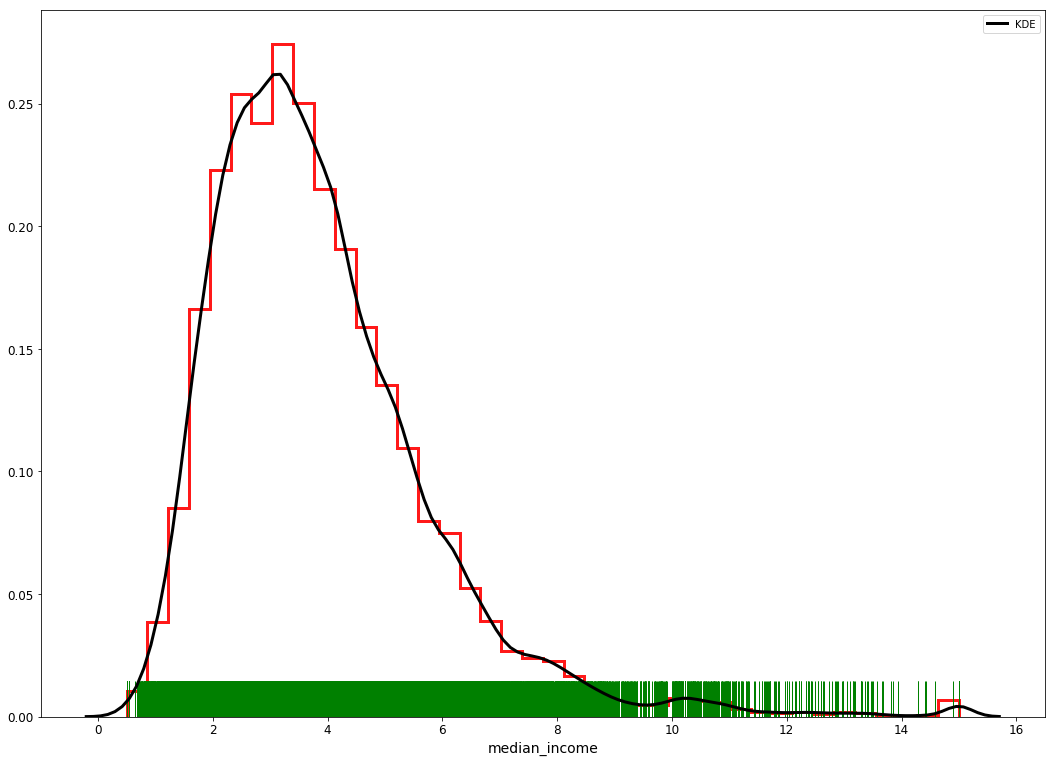

In [55]:
plt.figure(figsize = (18,13))
sns.distplot(housing["median_income"],bins = 40,
                 rug=True, rug_kws={"color": "g"},# rug:Plot datapoints in an array as sticks on an axis.
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},# 核函数参数
                  hist_kws={"histtype": "step", "linewidth": 3, # 直方图参数
                             "alpha": 0.9, "color": "r"}) 
plt.show()

## 将median_income改为离散值的方法，还可以再深究

In [56]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5) # np.ceil  小数都约为最大的数  ，np.floor 小数约为最小的数
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) # 大于5的数赋值为5

## Stratified ShuffleSplit cross-validator   - 分层采样

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42) # 如果需要交叉验证，则n_splits可以取大于1的，生存多组样本
for train_index, test_index in split.split(housing, housing['income_cat']):
    #print ( train_index,test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


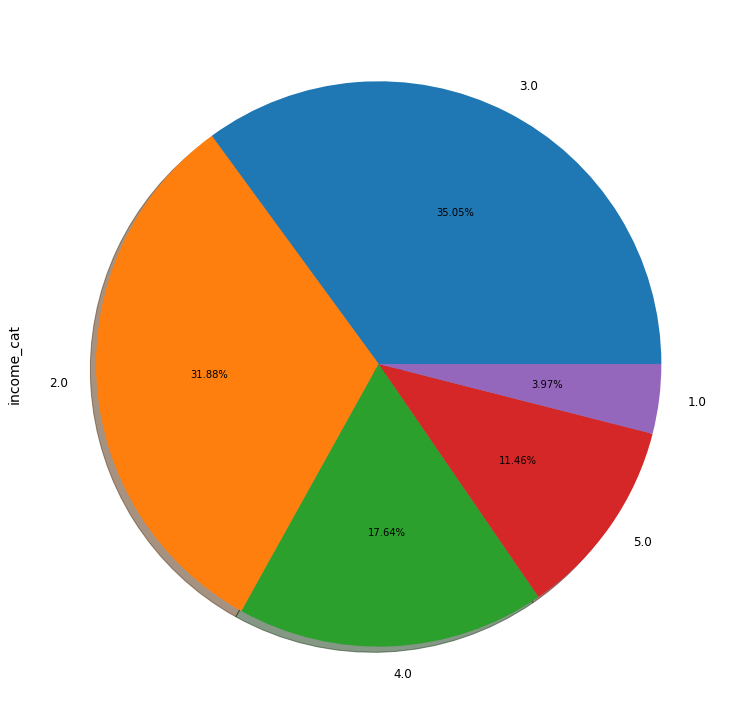

In [58]:
strat_test_set["income_cat"].value_counts().plot.pie(autopct = '%1.2f%%', shadow = True,figsize = (18,13))
plt.show()

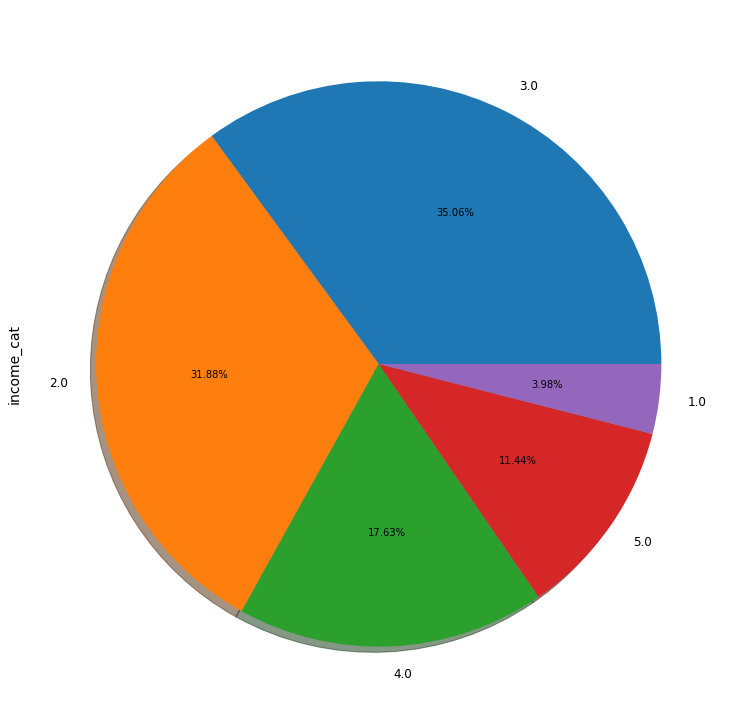

In [59]:
housing["income_cat"].value_counts().plot.pie(autopct = '%1.2f%%', shadow = True,figsize = (18,13))

In [60]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall':income_cat_proportions(housing),
    'Stratified': income_cat_proportions(strat_test_set),
    'Random': income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

## 分层采样和随机采样的比例以及偏差
可以看出纯随机采样的偏差较大

In [61]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [62]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [63]:
housing = strat_train_set.copy()

查看经纬度散点图

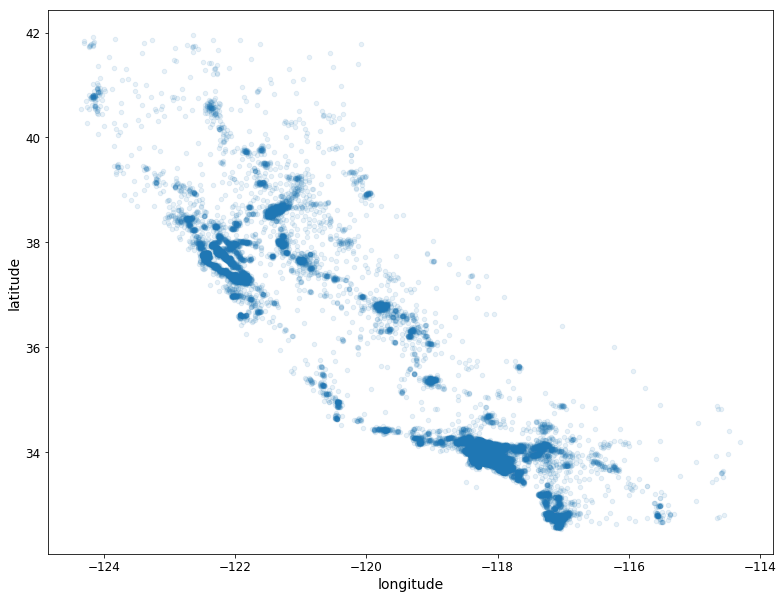

In [64]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha =0.1,figsize= (13,10));plt.show() #加上alpha可以看出数据高密度的区域

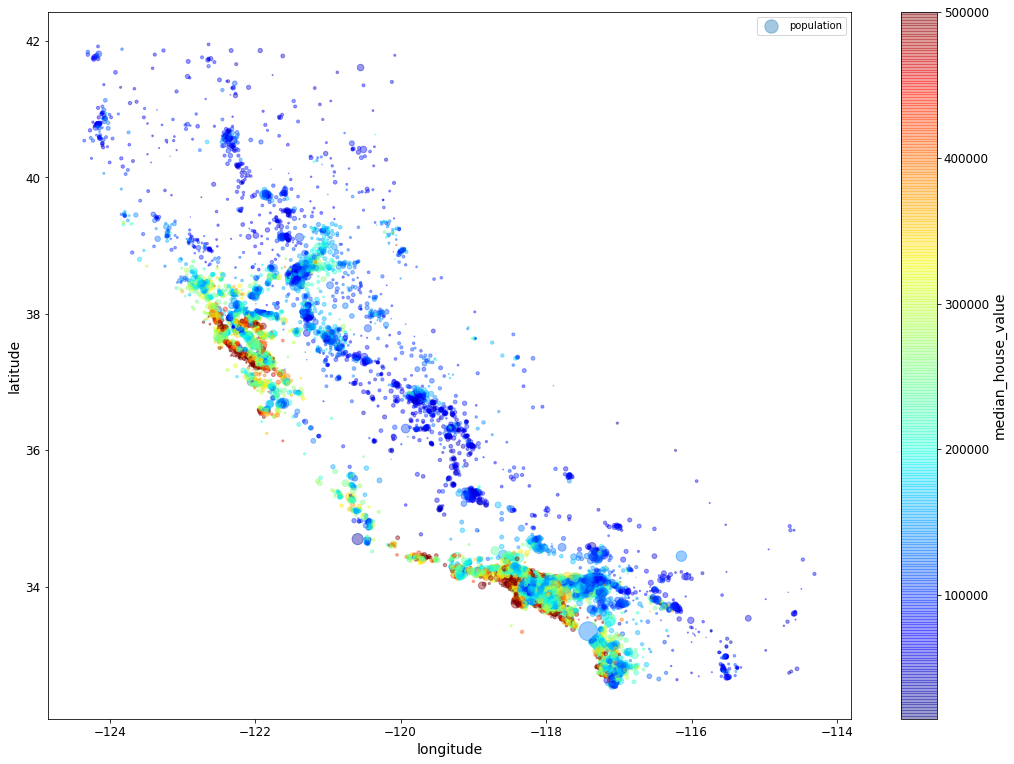

In [65]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100,  #the marker size
    label="population", figsize=(18,13),
    c="median_house_value",  # continuous colors
    cmap=plt.get_cmap("jet"), colorbar=True,  # jet是蓝到红的颜色  
    sharex=False) #The argument sharex=False fixes a display bug (the x-axis values and legend were not displayed)
plt.legend()
plt.show()

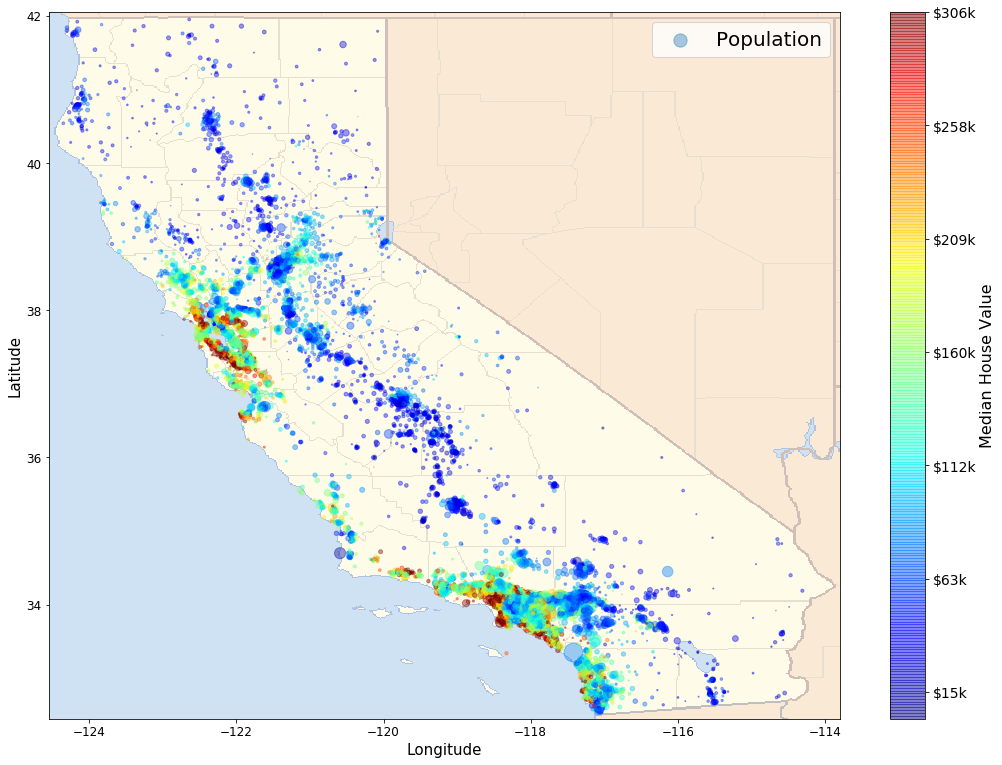

In [66]:
import matplotlib.image as mpimg
california_img = mpimg.imread('./images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(18,13),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha= 0.5, cmap = plt.get_cmap('jet'))
plt.ylabel('Latitude', fontsize =15)
plt.xlabel('Longitude', fontsize =15)
prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(),11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize =16)
plt.legend(fontsize = 20)
plt.show()

In [67]:
corr_matrix = housing.corr() # compute pairwise correlation of columns, excluding NA/null values,  covariance

In [68]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


查看median_house_value于其他变量的线性相关性， 数据越靠近1则越相关，越靠近-1则越负相关

In [69]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

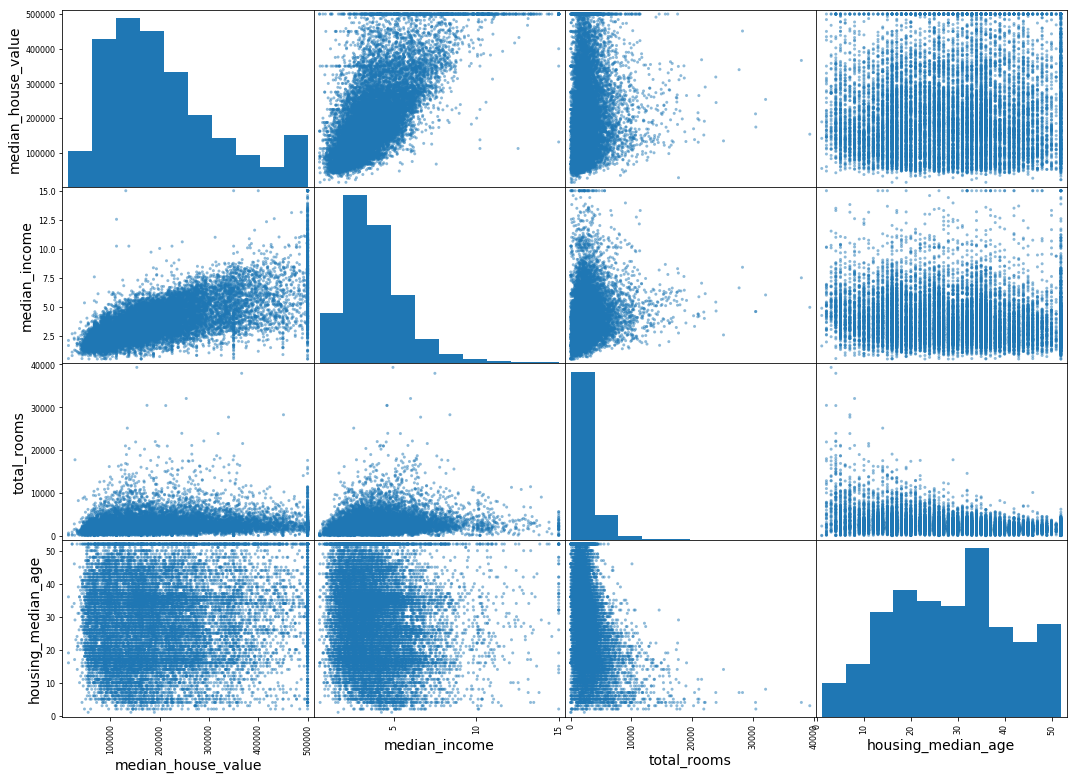

In [70]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(18, 13))
plt.show()

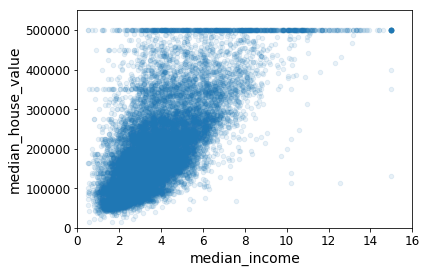

In [71]:
housing.plot( kind = 'scatter', x = 'median_income', y= 'median_house_value', alpha =0.1)
plt.axis([0,16,0,550000]); plt.show()

特征组合

In [72]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

可以看到bedrooms_per_room 呈现很大的负相关，每个房子的卧室越少，价格反而越贵

In [73]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

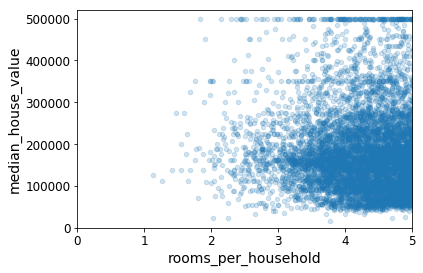

In [74]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Prepare the data for Machine Learning algorithms

分开feature和label , 以 median_house_value作为标签

In [137]:
list(strat_train_set)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [138]:
train_housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
train_housing_labels= strat_train_set["median_house_value"].copy()

缺失值的处理：
1. 去掉Na
2. 去掉整个feature
3. 给缺失值补上 0, 平均数，中位数等

In [140]:
median = train_housing['total_bedrooms'].median()
train_housing['total_bedrooms'].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

In [80]:
train_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


使用sklearn的方法来处理缺失值： 必须都是实数值

In [88]:
from sklearn.preprocessing import Imputer
imputer = Imputer( strategy = 'median')
housing_num = train_housing.drop( 'ocean_proximity', axis = 1) # 丢掉文本
imputer.fit(housing_num)
X = imputer.transform(housing_num)
#X = imputer.fit_transform(housing_num)
housing_tr = pd.DataFrame(X , columns= housing_num.columns)

/data1/tangx/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


处理文本特征

先将文本特征编码为实数特征，对应的skleran的类为LabelEncoder

In [97]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = train_housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat) #  转换文本为数字编码
print (housing_cat_encoded)
print (encoder.classes_)

[0 0 4 ... 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


这种数字编码会导致 0&1的相似性比0&3的要强，然而互相之间是独立的

## 采用one-hot编码

In [104]:
from  sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) # 默认输出的结果是稀疏矩阵Scipy ( sparse matrix),用toarray()转化为dense matrix
housing_cat_1hot.toarray()

/data1/tangx/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

一步完成文本到onehot编码

In [141]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform( housing_cat)

In [143]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [142]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='<U10')

自定义transformer

In [113]:
from sklearn.base import BaseEstimator, TransformerMixin 
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6 
 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):    
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs         
        self.add_bedrooms_per_room = add_bedrooms_per_room     
    def fit(self, X, y=None):         
        return self # nothing else to do     
    def transform(self, X, y=None):         
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]         
        population_per_household = X[:, population_ix] / X[:, household_ix]         
        if self.add_bedrooms_per_room:             
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]             
            return np.c_[X, rooms_per_household, population_per_household,                          
                         bedrooms_per_room]         
        else:             
            return np.c_[X, rooms_per_household, population_per_household] 
 
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) 
housing_extra_attribs = attr_adder.transform(housing.values)


## 特征缩放

将特征压缩到同一尺度
1. MinMaxScaler 将特征缩放到0-1之间，异常值影响较大
2. feature_range: 可自定义缩放范围，不一定是0-1
3. StandardScaler ：标准化（减均值，除方差）， 对异常值的影响较小

流程化处理

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ( 'imputer', Imputer( strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

/data1/tangx/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## 结合多个pipline

In [148]:
from sklearn.base import BaseEstimator, TransformerMixin 
class DataFrameSelector(BaseEstimator, TransformerMixin):   # 处理dataframe
    def __init__(self, attribute_names):         
        self.attribute_names = attribute_names     
    def fit(self, X, y=None):        
        return self     
    def transform(self, X):         
        return X[self.attribute_names].values
    
from sklearn.base import BaseEstimator, TransformerMixin
class LabelBinarizer_new(TransformerMixin, BaseEstimator):     
    def fit(self, X, y = 0):         
        self.encoder = None         
        return self     
    def transform(self, X, y = 0): 
        if(self.encoder is None):             
            print("Initializing encoder")             
            self.encoder = LabelBinarizer();             
            result = self.encoder.fit_transform(X)         
        else:             
            result = self.encoder.transform(X)         
        return result


In [156]:
from sklearn.pipeline import FeatureUnion 
num_attribs = list(housing_num) 
cat_attribs = ["ocean_proximity"] 
num_pipeline = Pipeline([ 
    ('selector', DataFrameSelector(num_attribs)), 
    ('imputer', Imputer(strategy="median")), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()), ]) 

cat_pipeline = Pipeline([ 
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer_new()), ]) 

full_pipeline = FeatureUnion(transformer_list=[ 
    ("num_pipeline", num_pipeline), 
    ("cat_pipeline", cat_pipeline), ]) 

train_housing_prepared = full_pipeline.fit_transform(train_housing)

Initializing encoder


/data1/tangx/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# 选择和训练模型

## 训练一个线性回归模型(LinearRegression)

In [157]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_housing_prepared, train_housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

评估模型 ，计算均方误差( RMSE)

In [162]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(train_housing_prepared)
lin_mse = mean_squared_error(train_housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print (lin_rmse)

68628.19819848922


## 用决策树训练

In [166]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_housing_prepared, train_housing_labels)
housing_predictions = tree_reg.predict(train_housing_prepared)
tree_mse = mean_squared_error(train_housing_labels, housing_predictions) 
tree_rmse = np.sqrt(tree_mse) 
print (tree_rmse)

0.0


可能是过拟合导致的误差小

## 采用交叉验证法来减少过拟合
将数据分为K份，每次用k-1份训练模型，剩余1份作为验证集， 训练K次后，计算K次的平均误差来评估模型

In [176]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, train_housing_prepared, train_housing_labels,
                             scoring='neg_mean_squared_error', cv= 10)
lin_scores = cross_val_score(lin_reg, train_housing_prepared, train_housing_labels, 
                             scoring="neg_mean_squared_error", cv=10) 
tree_rmse_scores = np.sqrt(-tree_scores)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):     
    print("Scores:", scores)     
    print("Mean:", scores.mean())     
    print("Standard deviation:", scores.std())
print ('error in tree_rmse_scores'  )    
display_scores(tree_rmse_scores)
print ('error in lin_rmse_scores')    
display_scores(lin_rmse_scores)

error in tree_rmse_scores
Scores: [67057.63636567 66434.10386495 71098.61505618 69552.51559593
 71386.45369293 75250.84583226 70971.48364843 71131.6205969
 77499.478226   69457.93772104]
Mean: 70984.06906002865
Standard deviation: 3183.5575040339104
error in lin_rmse_scores
Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


可以看到线性回归模型的交叉验证平均误差比决策树小，说明决策树明显是过拟合了

## 保存模型

In [183]:
from sklearn.externals import joblib
joblib.dump( tree_reg, 'my_model.pkl')
# 加载模型
my_model_loaded = joblib.load( 'my_model.pkl')
my_model_loaded

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 模型调参

通过网格来排列组合这些可能的参数

In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]

forest_reg =RandomForestRegressor()
grid_search = GridSearchCV( forest_reg, param_grid, cv = 5, scoring='neg_mean_squared_error')

In [199]:
%timeit grid_search.fit( train_housing_prepared, train_housing_labels)

42.5 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [203]:
grid_search.best_params_  #  查看最好的参数

{'max_features': 6, 'n_estimators': 30}

In [202]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [207]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'], cvres['params']):
    print (np.sqrt(-mean_score),params)

64027.698230793896 {'max_features': 2, 'n_estimators': 3}
55139.796428417074 {'max_features': 2, 'n_estimators': 10}
52817.795770648314 {'max_features': 2, 'n_estimators': 30}
60145.70064723545 {'max_features': 4, 'n_estimators': 3}
53497.982711118486 {'max_features': 4, 'n_estimators': 10}
50452.077354409696 {'max_features': 4, 'n_estimators': 30}
59822.82508559846 {'max_features': 6, 'n_estimators': 3}
52037.80691048227 {'max_features': 6, 'n_estimators': 10}
50116.92048722595 {'max_features': 6, 'n_estimators': 30}
58753.6131311032 {'max_features': 8, 'n_estimators': 3}
52460.164135951854 {'max_features': 8, 'n_estimators': 10}
50274.98793916946 {'max_features': 8, 'n_estimators': 30}
62733.77427127611 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54084.65778854586 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61162.29807268728 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52401.93857840355 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [211]:
pd.DataFrame(grid_search.cv_results_)

/data1/tangx/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/data1/tangx/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/data1/tangx/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/data1/tangx/anaconda3/lib/pyth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052623,0.001075,0.002635,0.000027,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.003022e+09,-4.376302e+09,...,-4.099546e+09,1.559735e+08,18,-1.126724e+09,-1.141602e+09,-1.073016e+09,-1.064012e+09,-1.082920e+09,-1.097655e+09,3.076490e+07
1,0.171829,0.002379,0.007402,0.000064,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.867024e+09,-3.207176e+09,...,-3.040397e+09,2.018491e+08,11,-5.779105e+08,-5.731368e+08,-5.858268e+08,-5.654517e+08,-6.017707e+08,-5.808193e+08,1.239099e+07
2,0.518399,0.004190,0.025149,0.000182,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.645801e+09,-2.882439e+09,...,-2.789720e+09,1.148486e+08,8,-4.414467e+08,-4.226153e+08,-4.202097e+08,-4.437203e+08,-4.288801e+08,-4.313744e+08,9.606958e+06
3,0.086482,0.001736,0.002613,0.000015,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.287587e+09,-3.883517e+09,...,-3.617505e+09,2.470337e+08,15,-1.007536e+09,-9.762636e+08,-1.025969e+09,-9.708359e+08,-9.710782e+08,-9.903366e+08,2.242645e+07
4,0.287597,0.004815,0.007419,0.000060,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.729134e+09,-2.927043e+09,...,-2.862034e+09,1.182988e+08,9,-5.212608e+08,-5.199880e+08,-5.065266e+08,-5.487013e+08,-4.932332e+08,-5.179420e+08,1.845086e+07
5,0.860794,0.006041,0.025100,0.000173,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.409532e+09,-2.573330e+09,...,-2.545412e+09,1.257894e+08,3,-3.946779e+08,-3.905654e+08,-3.841188e+08,-3.948260e+08,-3.914636e+08,-3.911303e+08,3.894508e+06
6,0.122806,0.001553,0.002613,0.000018,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.315937e+09,-3.744221e+09,...,-3.578770e+09,2.198417e+08,14,-9.070379e+08,-9.514477e+08,-8.069076e+08,-8.898599e+08,-9.558513e+08,-9.022209e+08,5.396315e+07
7,0.402472,0.004612,0.007410,0.000024,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.627594e+09,-2.740023e+09,...,-2.707933e+09,9.426619e+07,5,-4.981037e+08,-4.999331e+08,-4.802689e+08,-5.204349e+08,-4.989713e+08,-4.995424e+08,1.273195e+07
8,1.211237,0.008402,0.025074,0.000150,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.441334e+09,-2.535580e+09,...,-2.511706e+09,9.435087e+07,1,-3.980970e+08,-3.825036e+08,-3.693304e+08,-3.955976e+08,-3.753014e+08,-3.841660e+08,1.119104e+07
9,0.156376,0.002203,0.002614,0.000013,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.202900e+09,-3.688461e+09,...,-3.451987e+09,2.127701e+08,13,-9.201159e+08,-9.325372e+08,-8.681209e+08,-8.972047e+08,-8.815055e+08,-8.998969e+08,2.378824e+07


## 随机搜索(Randomized Search)
通过给参数设定一些范围，在范围内使用随机搜索选择参数

In [224]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit( train_housing_prepared, train_housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fca3c136e48>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fca3c1362e8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [225]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


In [227]:
feature_importances = grid_search.best_estimator_.feature_importances_ ;feature_importances

array([7.73239050e-02, 6.73009390e-02, 4.13238711e-02, 1.80945774e-02,
       1.58684012e-02, 1.77306020e-02, 1.62198690e-02, 3.43869016e-01,
       6.34184967e-02, 1.06321335e-01, 6.04038554e-02, 1.35636004e-02,
       1.52809900e-01, 6.51237579e-05, 2.31485840e-03, 3.37164825e-03])

In [231]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [230]:
encoder?

Type:        LabelBinarizer
String form: LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
File:        ~/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py
Docstring:  
Binarize labels in a one-vs-all fashion

Several regression and binary classification algorithms are
available in scikit-learn. A simple way to extend these algorithms
to the multi-class classification case is to use the so-called
one-vs-all scheme.

At learning time, this simply consists in learning one regressor
or binary classifier per class. In doing so, one needs to convert
multi-class labels to binary labels (belong or does not belong
to the class). LabelBinarizer makes this process easy with the
transform method.

At prediction time, one assigns the class for which the corresponding
model gave the greatest confidence. LabelBinarizer makes this easy
with the inverse_transform method.

Read more in the :ref:`User Guide <preprocessing_targets>`.

Parameters
----------

neg_label : int 